Name - Aditya Kothari

Roll no. - I028

Batch - B1

In [1]:
import numpy as np
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import brown
from urllib import request
from nltk import sent_tokenize, word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.corpus import stopwords
from nltk.corpus import webtext
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
import requests
from nltk.text import Text
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk.util import bigrams, trigrams, ngrams
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import string
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

To access two books or novels and perform the following task

In [3]:
from urllib import request
url = "https://www.gutenberg.org/cache/epub/345/pg345.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

In [4]:
raw

'\ufeff\r\n    The Project Gutenberg eBook of Dracula\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and \r\nmost other parts of the world at no cost and with almost no restrictions \r\nwhatsoever. You may copy it, give it away or re-use it under the terms \r\nof the Project Gutenberg License included with this ebook or online \r\nat www.gutenberg.org. If you are not located in the United States, \r\nyou will have to check the laws of the country where you are located \r\nbefore using this eBook.\r\n\r\n\r\n\r\n    \r\n        Title: Dracula\r\n        \r\n        Author: Bram Stoker\r\n\r\n        \r\n        Release date: October 1, 1995 [eBook #345]Most recently updated: July 30, 2023\r\n        Language: English\r\n        \r\n        \r\n    \r\n        \r\n            *** START OF THE PROJECT GUTENBERG EBOOK DRACULA ***\r\n        \r\n\r\n\r\n\r\n                                DRACULA\r\n\r\n                                  _by_\r\n\r\n            

Category: adventure
Total words: 69342
Total sentences: 4637
Most frequent words: [('.', 4057), (',', 3488), ('the', 3370), ('and', 1622), ('a', 1354), ('of', 1322), ('to', 1309), ('``', 998), ("''", 995), ('was', 914)]
--------------------------------------------------


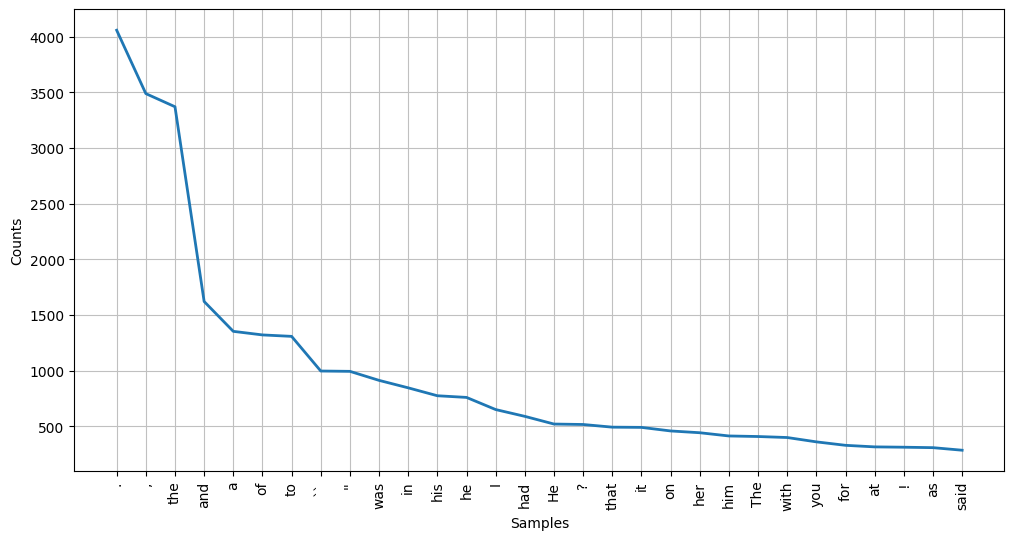

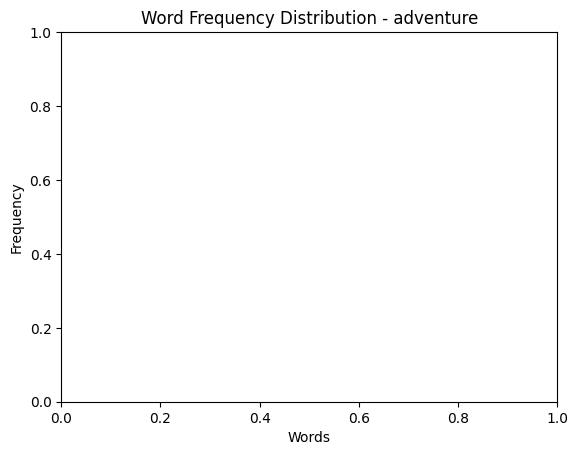

Category: belles_lettres
Total words: 173096
Total sentences: 7209
Most frequent words: [('the', 9726), (',', 9166), ('.', 6397), ('of', 6289), ('and', 4282), ('to', 4084), ('a', 3308), ('in', 3089), ('that', 1896), ('is', 1799)]
--------------------------------------------------


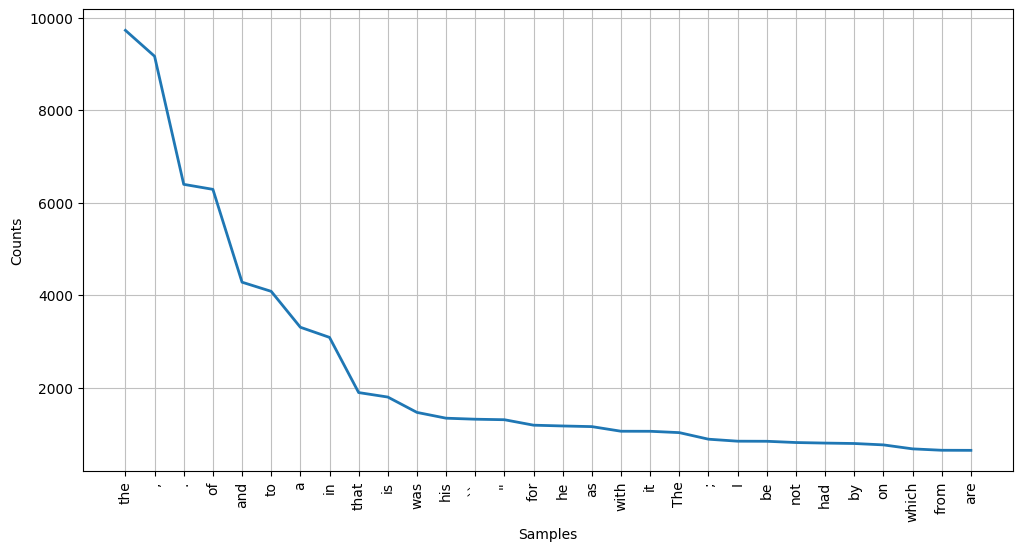

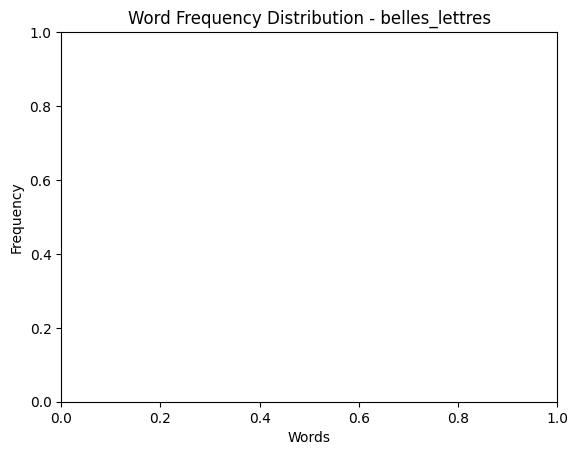

Category: editorial
Total words: 61604
Total sentences: 2997
Most frequent words: [('the', 3508), (',', 2766), ('.', 2481), ('of', 1976), ('to', 1554), ('and', 1302), ('a', 1095), ('in', 1001), ('is', 744), ('that', 578)]
--------------------------------------------------


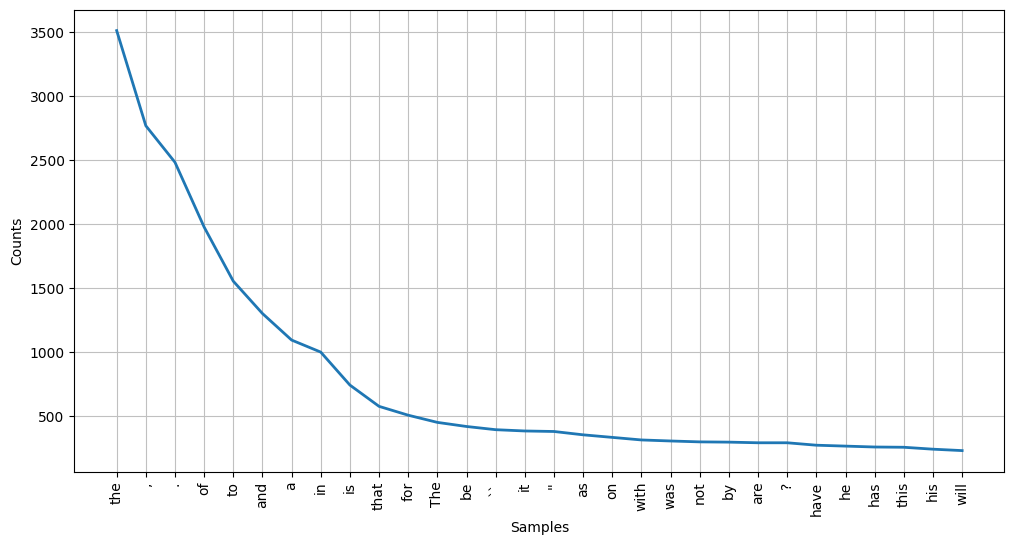

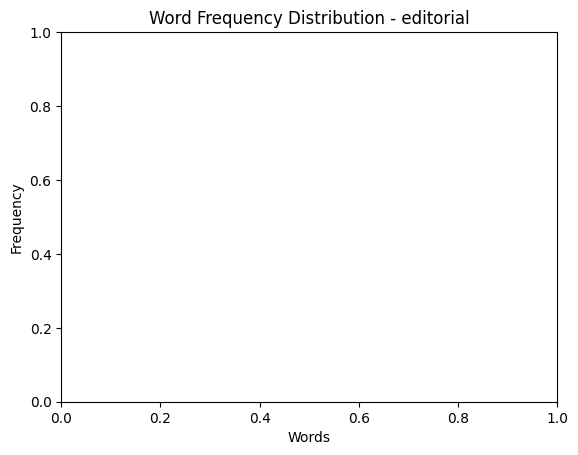

Category: fiction
Total words: 68488
Total sentences: 4249
Most frequent words: [(',', 3654), ('.', 3639), ('the', 3423), ('and', 1696), ('to', 1489), ('of', 1419), ('a', 1281), ('was', 1082), ('in', 916), ('he', 813)]
--------------------------------------------------


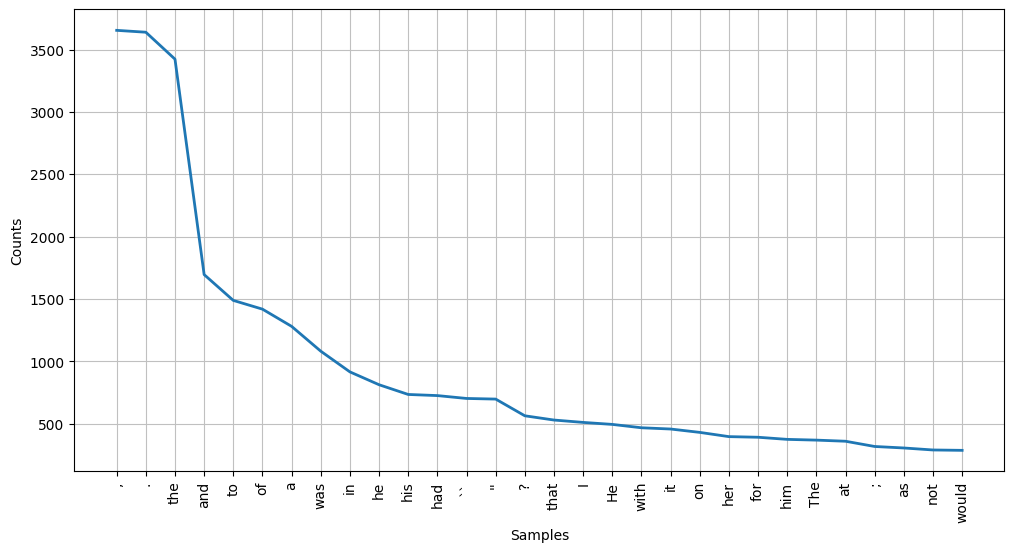

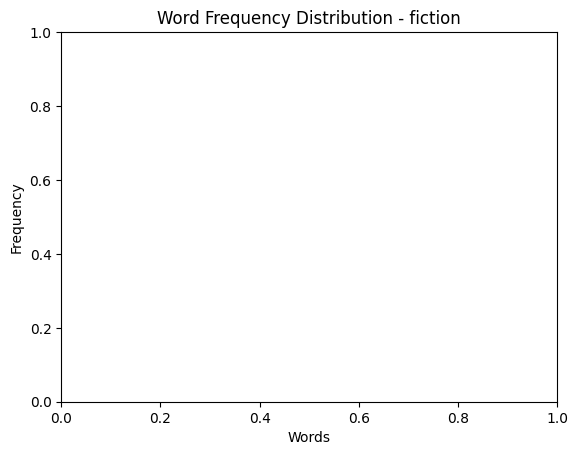

Category: government
Total words: 70117
Total sentences: 3032
Most frequent words: [('the', 4143), (',', 3405), ('of', 3031), ('.', 2493), ('and', 1923), ('to', 1829), ('in', 1319), ('a', 867), ('for', 806), ('is', 649)]
--------------------------------------------------


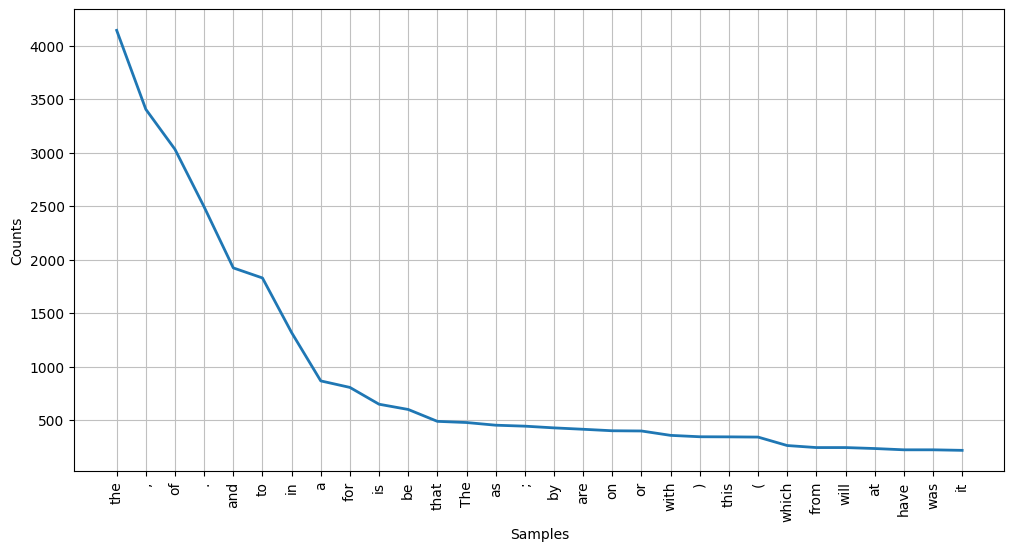

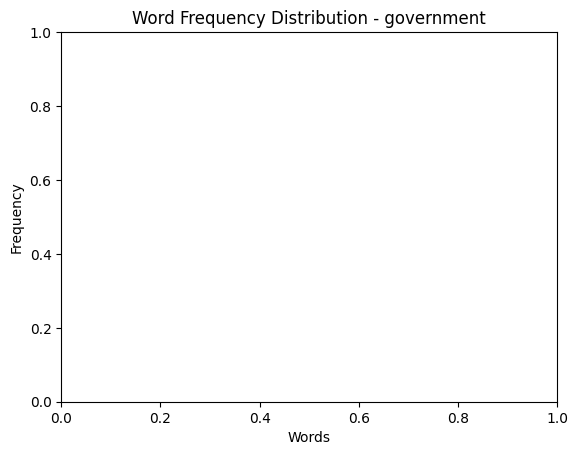

Category: hobbies
Total words: 82345
Total sentences: 4193
Most frequent words: [('the', 4300), (',', 3849), ('.', 3453), ('of', 2390), ('and', 2144), ('to', 1797), ('a', 1737), ('in', 1427), ('is', 959), ('for', 776)]
--------------------------------------------------


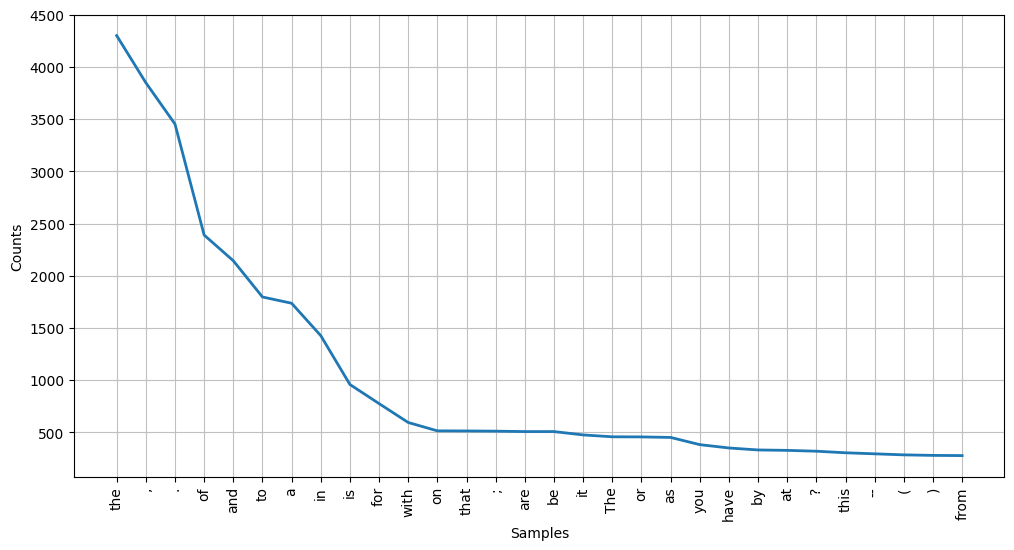

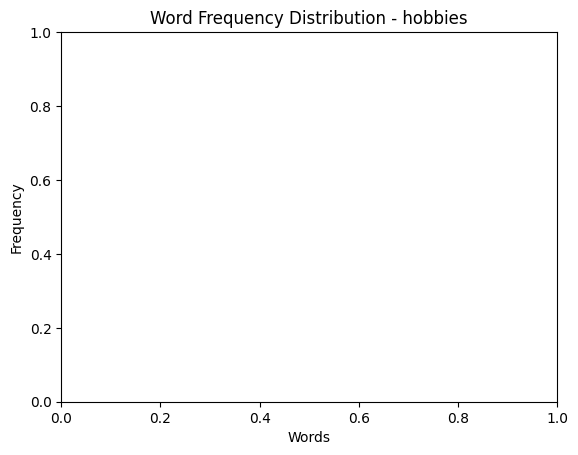

Category: humor
Total words: 21695
Total sentences: 1053
Most frequent words: [(',', 1331), ('the', 930), ('.', 877), ('of', 515), ('and', 512), ('a', 505), ('to', 463), ('``', 343), ("''", 340), ('in', 334)]
--------------------------------------------------


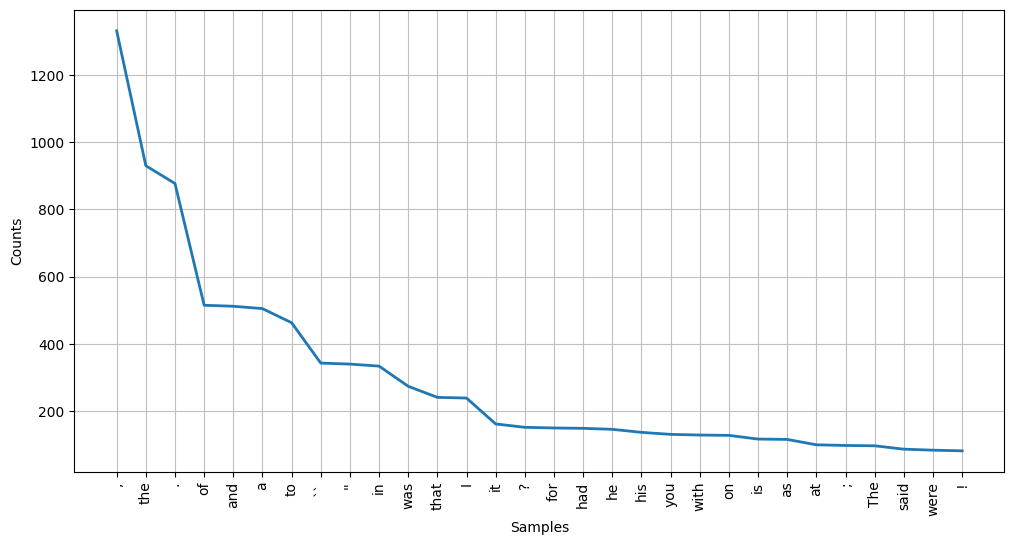

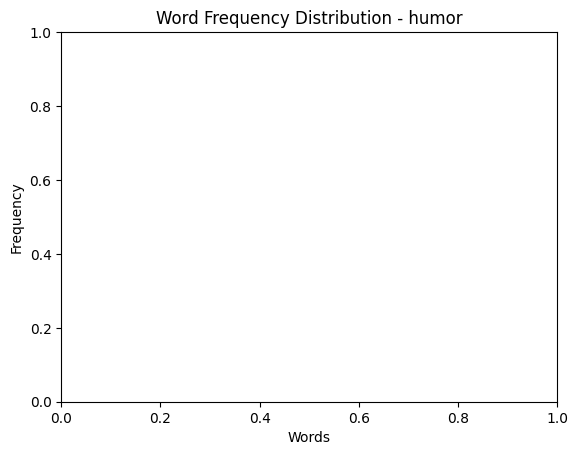

Category: learned
Total words: 181888
Total sentences: 7734
Most frequent words: [('the', 11079), (',', 8242), ('of', 7418), ('.', 6773), ('and', 4237), ('to', 3882), ('in', 3644), ('a', 3215), ('is', 2403), ('that', 1695)]
--------------------------------------------------


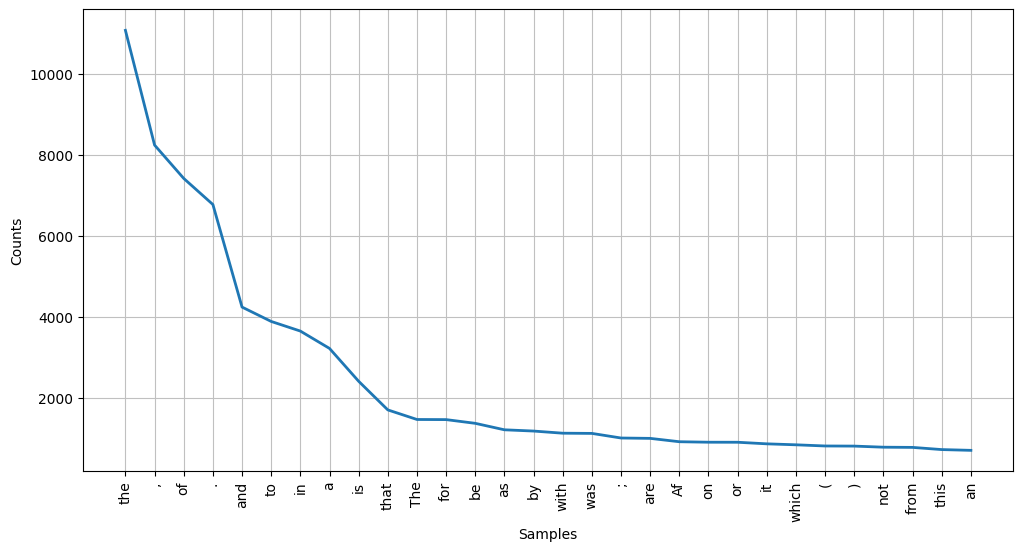

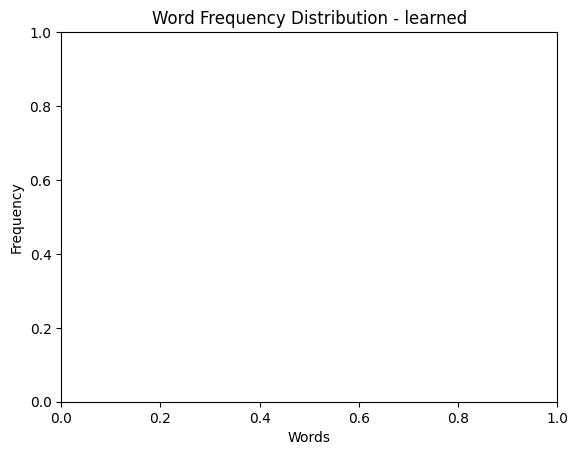

Category: lore
Total words: 110299
Total sentences: 4881
Most frequent words: [('the', 6328), (',', 5519), ('.', 4367), ('of', 3668), ('and', 2758), ('to', 2530), ('a', 2304), ('in', 2001), ('is', 1007), ('that', 984)]
--------------------------------------------------


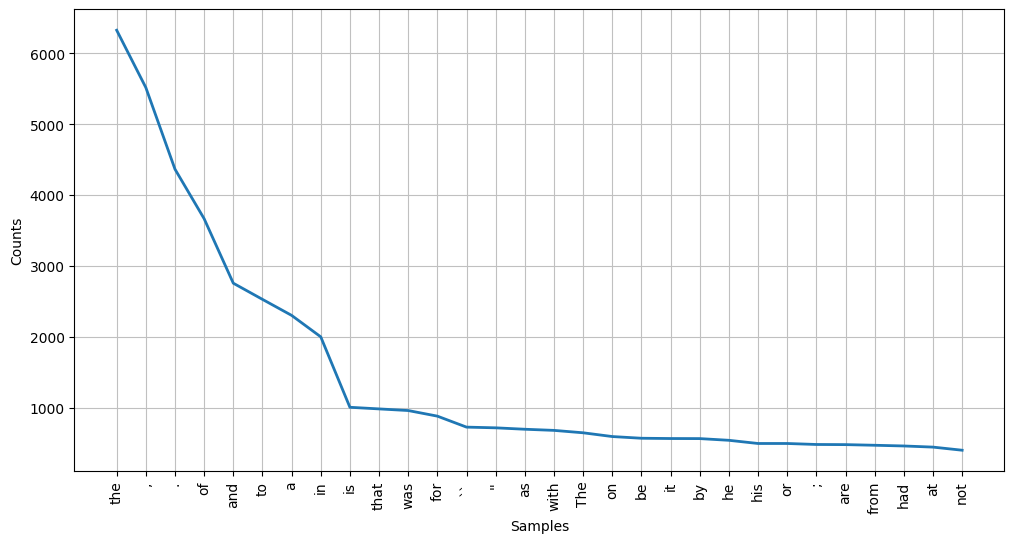

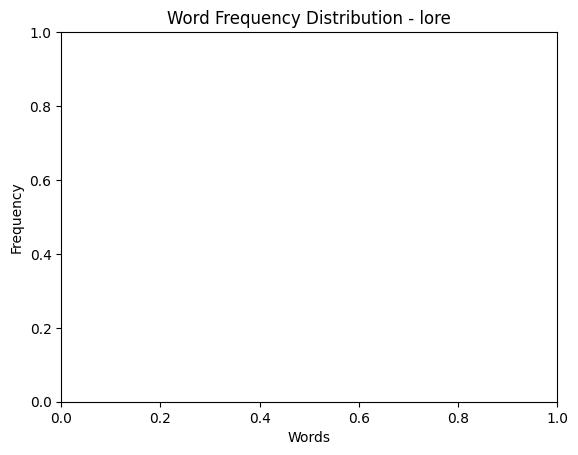

Category: mystery
Total words: 57169
Total sentences: 3886
Most frequent words: [('.', 3326), (',', 2805), ('the', 2573), ('to', 1284), ('and', 1215), ('a', 1136), ('of', 903), ('was', 820), ('``', 740), ("''", 738)]
--------------------------------------------------


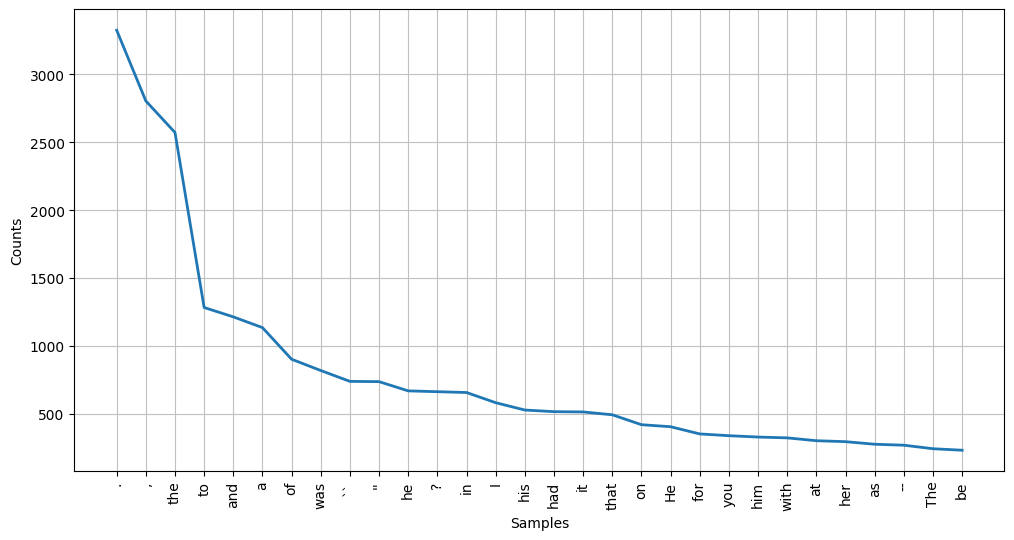

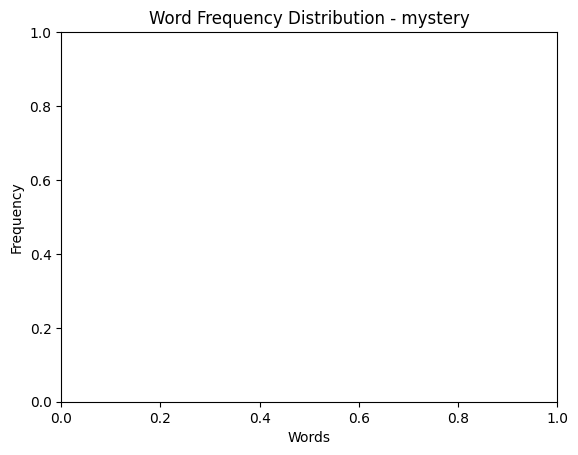

Category: news
Total words: 100554
Total sentences: 4623
Most frequent words: [('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146), ('to', 2116), ('a', 1993), ('in', 1893), ('for', 943), ('The', 806)]
--------------------------------------------------


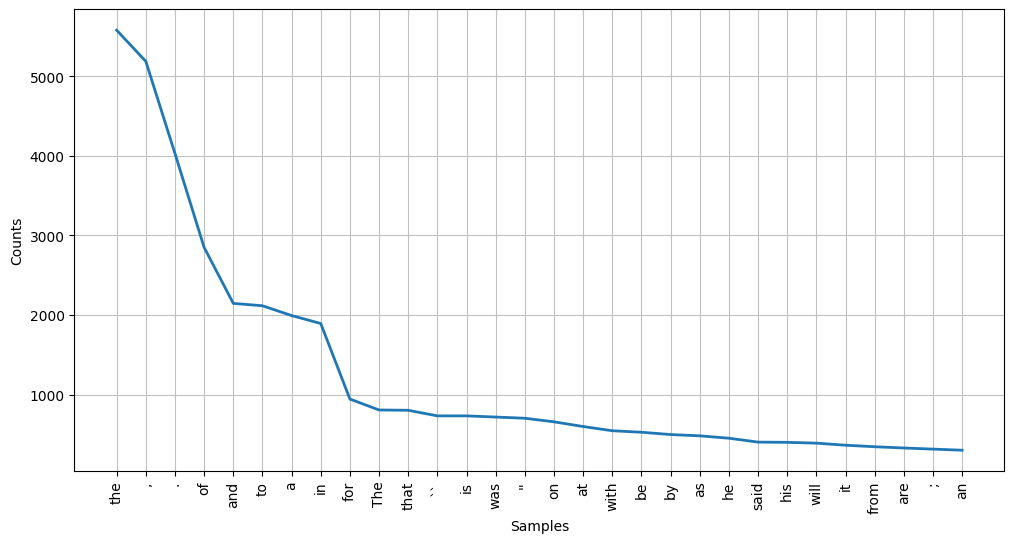

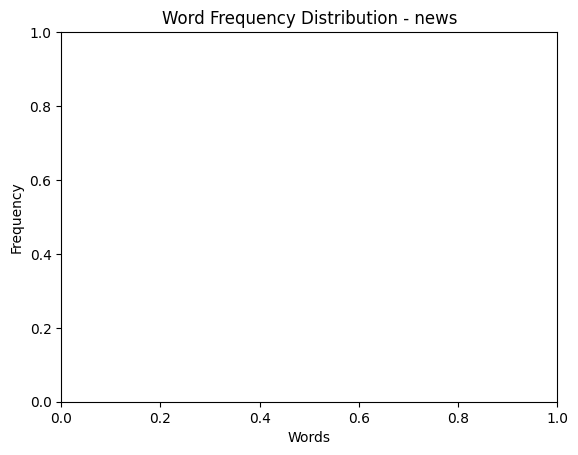

Category: religion
Total words: 39399
Total sentences: 1716
Most frequent words: [('the', 2295), (',', 1913), ('of', 1494), ('.', 1382), ('and', 921), ('to', 882), ('in', 724), ('a', 655), ('is', 533), ('that', 475)]
--------------------------------------------------


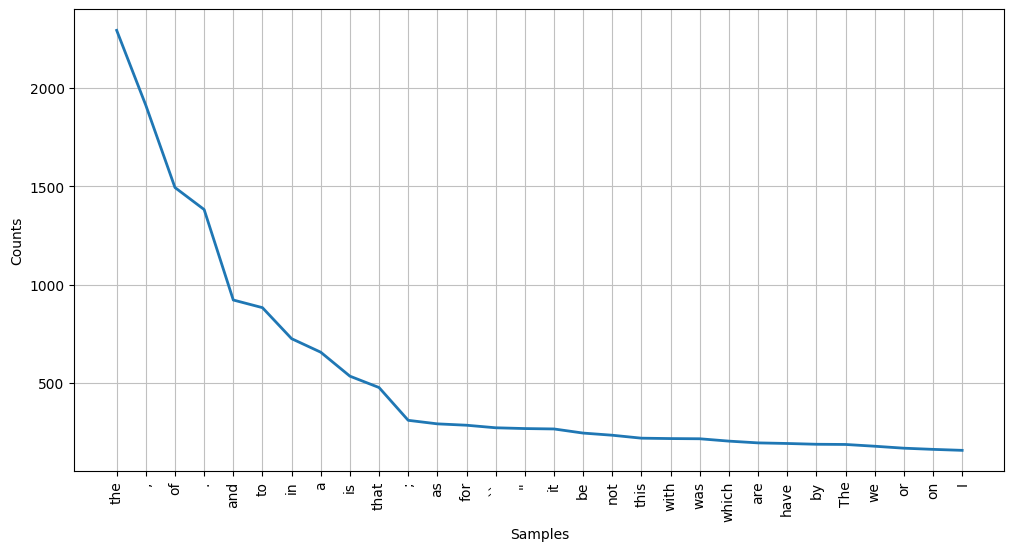

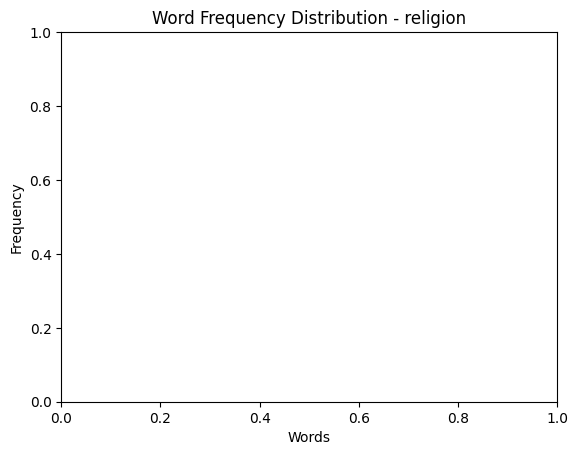

Category: reviews
Total words: 40704
Total sentences: 1751
Most frequent words: [(',', 2318), ('the', 2048), ('.', 1549), ('of', 1299), ('and', 1103), ('a', 874), ('to', 706), ('in', 656), ('is', 513), ('``', 390)]
--------------------------------------------------


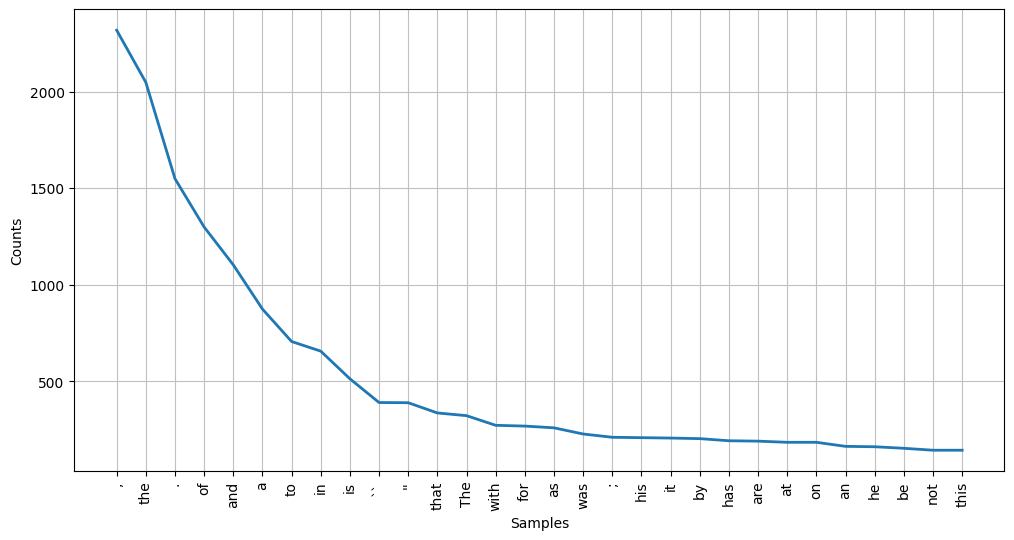

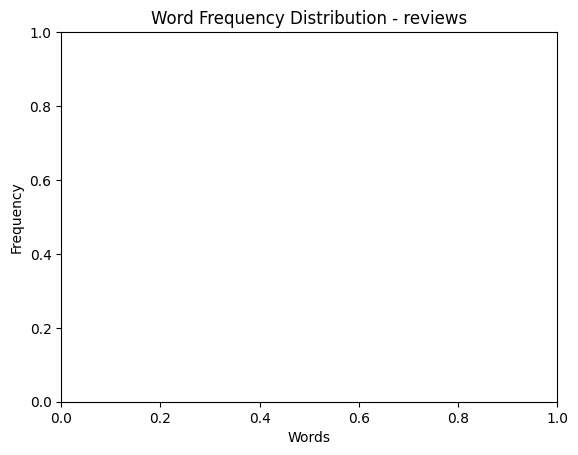

Category: romance
Total words: 70022
Total sentences: 4431
Most frequent words: [(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993)]
--------------------------------------------------


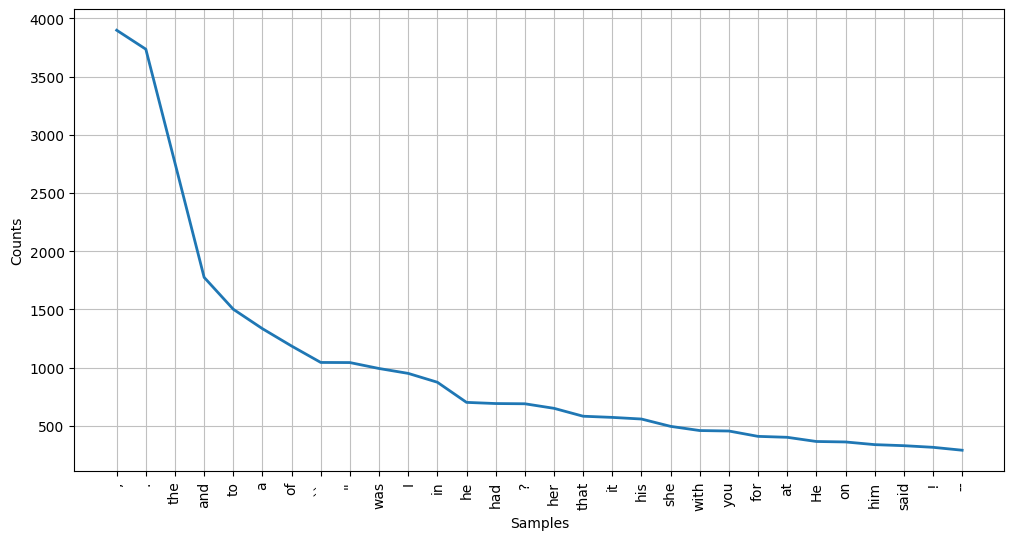

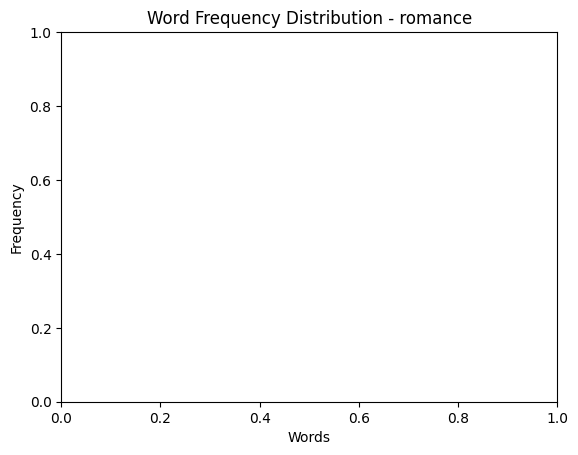

Category: science_fiction
Total words: 14470
Total sentences: 948
Most frequent words: [(',', 791), ('.', 786), ('the', 652), ('of', 321), ('to', 305), ('and', 278), ('``', 235), ("''", 235), ('a', 222), ('was', 198)]
--------------------------------------------------


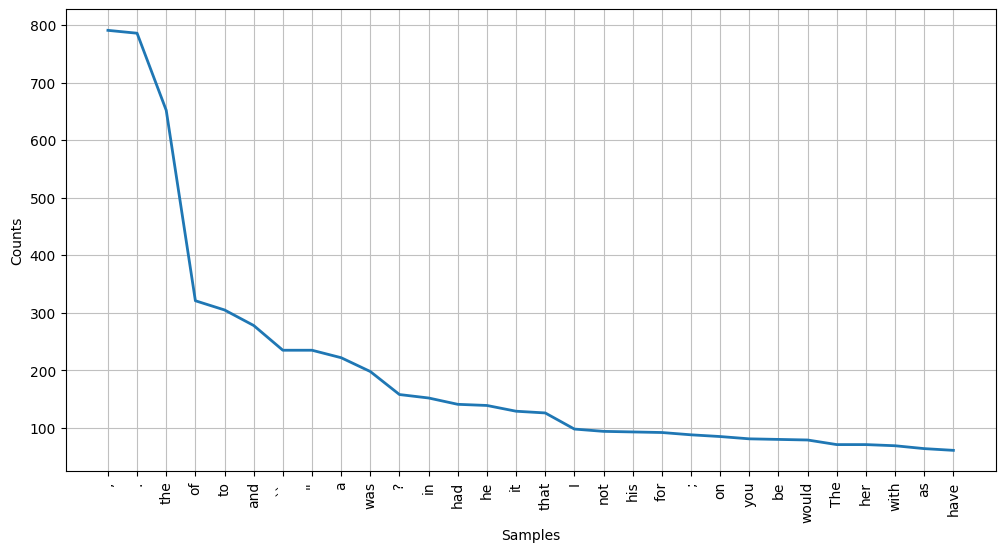

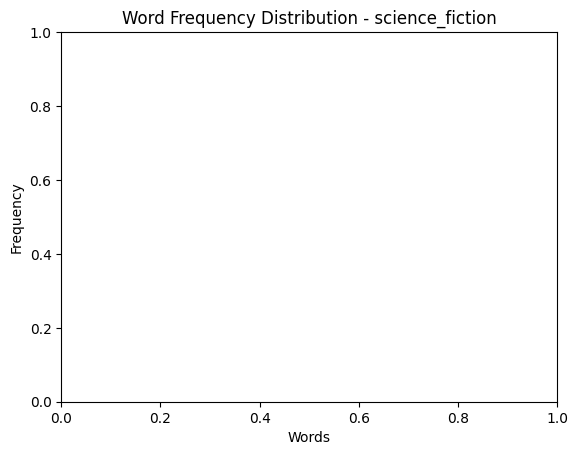

In [5]:
def compareCategories():
    categories = brown.categories()
    for category in categories:
        num_words = len(brown.words(categories=category))
        sents = len(brown.sents(categories=category))
        freq_dist = nltk.FreqDist(brown.words(categories=category))

        print("Category:", category)
        print("Total words:", num_words)
        print("Total sentences:", sents)
        print("Most frequent words:", freq_dist.most_common(10))
        print("-" * 50)

        plt.figure(figsize=(12, 6))
        freq_dist.plot(30, cumulative=False)
        plt.title(f"Word Frequency Distribution - {category}")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.show()
compareCategories()

In [8]:
def book_analysis(text):
    words = nltk.word_tokenize(text)
    sentences = nltk.sent_tokenize(text)
    chapters = text.split('CHAPTER')

    # Word frequency distribution
    freq_dist = nltk.FreqDist(words)
    most_common_words = freq_dist.most_common(10)

    # Average chapter length
    avg_chapter_length = sum(len(words) for chapter in chapters) / len(chapters)

    # Most frequent phrases (bi, tri, and quadgrams)
    bi_grams = list(ngrams(words, 2))
    tri_grams = list(ngrams(words, 3))
    quad_grams = list(ngrams(words, 4))
    most_common_bi_grams = nltk.FreqDist(bi_grams).most_common(10)
    most_common_tri_grams = nltk.FreqDist(tri_grams).most_common(10)
    most_common_quad_grams = nltk.FreqDist(quad_grams).most_common(10)

    # Find names of characters and places (using named entity recognition)
    sentences = nltk.sent_tokenize(text)
    named_entities = []
    for sent in sentences:
        words = nltk.word_tokenize(sent)
        tagged_words = nltk.pos_tag(words)
        named_entities.extend(nltk.ne_chunk(tagged_words))

    # Print the analysis results
    print("\n\nMost common words:", most_common_words)
    print("-" * 50)
    print("\n\nAverage chapter length:", avg_chapter_length)
    print("-" * 50)
    print("\n\nMost common bigrams:", most_common_bi_grams)
    print("-" * 50)
    print("\n\nMost common trigrams:", most_common_tri_grams)
    print("-" * 50)
    print("\n\nMost common quadgrams:", most_common_quad_grams)
    print("-" * 50)
    print("\n\nNamed entities:", named_entities)
    print("-" * 50)

In [10]:
print("Analysis of the book: ")
book_analysis(raw[1000:20000])

Analysis of the book: 


Most common words: [(',', 244), ('the', 186), ('.', 133), ('and', 112), ('of', 107), ('I', 97), ('to', 69), ('in', 53), ('a', 47), ('that', 40)]
--------------------------------------------------


Average chapter length: 3926.0
--------------------------------------------------


Most common bigrams: [((',', 'and'), 47), (('’', 's'), 31), (('.', 'I'), 25), (('of', 'the'), 25), (('in', 'the'), 23), ((',', 'for'), 16), ((',', 'which'), 16), ((',', 'but'), 15), (('s', 'Journal'), 13), (('Journal', 'CHAPTER'), 12)]
--------------------------------------------------


Most common trigrams: [(('’', 's', 'Journal'), 13), (('s', 'Journal', 'CHAPTER'), 12), (('’', 's', 'Diary'), 11), (('s', 'Diary', 'CHAPTER'), 11), (('.', 'Dr.', 'Seward'), 11), (('Dr.', 'Seward', '’'), 11), (('Seward', '’', 's'), 11), (('Harker', '’', 's'), 9), (('Jonathan', 'Harker', '’'), 7), (('.', 'Jonathan', 'Harker'), 6)]
--------------------------------------------------


Most common quadgrams

B.) To select a dataset from real world example having reviews of any firm/product/books/hotel reviews etc and perform the following tasks

In [57]:
df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews 2.csv')

In [58]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [59]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [60]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [61]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [63]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [64]:
df.drop('Title', axis =1, inplace = True)

In [65]:
df.dropna(subset=["Review Text", "Division Name"], inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22628 non-null  int64 
 1   Clothing ID              22628 non-null  int64 
 2   Age                      22628 non-null  int64 
 3   Review Text              22628 non-null  object
 4   Rating                   22628 non-null  int64 
 5   Recommended IND          22628 non-null  int64 
 6   Positive Feedback Count  22628 non-null  int64 
 7   Division Name            22628 non-null  object
 8   Department Name          22628 non-null  object
 9   Class Name               22628 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.9+ MB


In [67]:
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [68]:
df

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [69]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [70]:
df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [71]:
def get_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Polarity'] = df['Review Text'].apply(get_polarity)

In [72]:
def get_word_count(text):
    words = text.split()
    return len(words)

df['Word Count'] = df['Review Text'].apply(get_word_count)

In [73]:
df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Word Count
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,8
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,62
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,98
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,22
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,36
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,28
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,38
23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,42
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,86


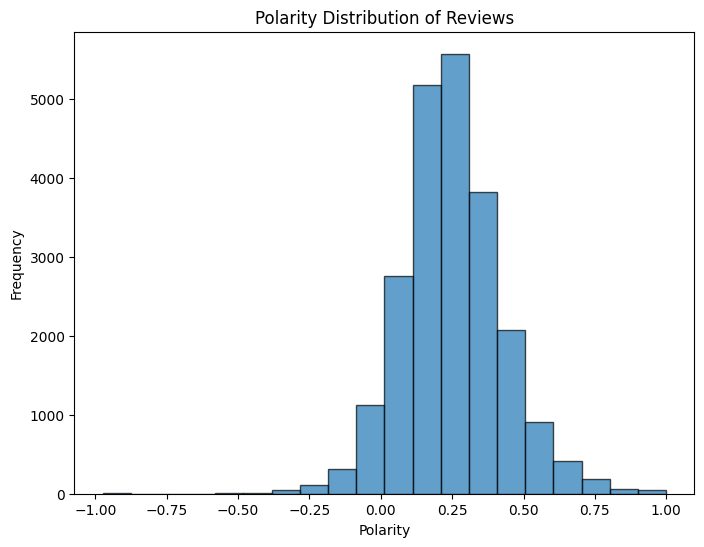

In [75]:
plt.figure(figsize=(8, 6))
plt.hist(df['Polarity'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Polarity Distribution of Reviews')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

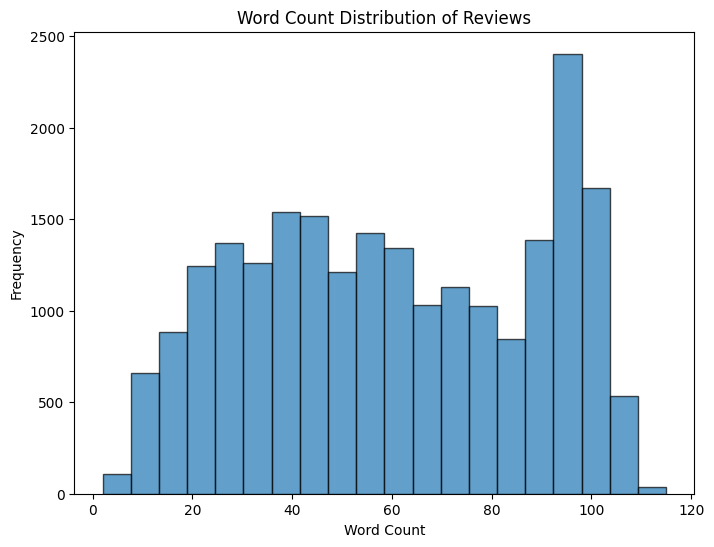

In [77]:
plt.figure(figsize=(8, 6))
plt.hist(df['Word Count'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Word Count Distribution of Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [81]:
def get_bigrams(text):
    words = nltk.word_tokenize(text.lower())
    bigram_list = list(ngrams(words, 2))
    return [' '.join(bigram) for bigram in bigram_list]

df['Bigrams'] = df['Review Text'].apply(get_bigrams)

In [82]:
df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Word Count,Bigrams
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,8,"[absolutely wonderful, wonderful -, - silky, s..."
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,62,"[love this, this dress, dress !, ! it, it 's, ..."
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,98,"[i had, had such, such high, high hopes, hopes..."
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,22,"[i love, love ,, , love, love ,, , love, love ..."
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,36,"[this shirt, shirt is, is very, very flatterin..."
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,28,"[i was, was very, very happy, happy to, to sna..."
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,38,"[it reminds, reminds me, me of, of maternity, ..."
23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,42,"[this fit, fit well, well ,, , but, but the, t..."
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,86,"[i bought, bought this, this dress, dress for,..."
